Below are my answers for the Statistics Exercises

In [32]:
#Please run this to import all needed modules for the below exercises

from __future__ import print_function, division

%matplotlib inline

import numpy as np
import nsfg
import first
import thinkstats2
import thinkplot
import analytic
import scipy.stats

In [29]:
#Q1. Think Stats Ch. 2 Exercise 4

#This portion prints the difference in mean birthweight between firstborns and others (= -0.125 lbs)
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]

firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

firsts_others_weight_diff = firsts.totalwgt_lb.mean() - others.totalwgt_lb.mean()
print('The difference between the average weight of firstborn babies and babies that are not first born is ' + str(round(firsts_others_weight_diff, 3)) + ' lbs')

#This portion computes the Cohen effect size for birth weights ( = -.0887). 
#This value is proportionally much larger in magnitude than the Cohen effect size for pregnancy length (.0289)

firstswgt_var = firsts.totalwgt_lb.var()
otherswgt_var = others.totalwgt_lb.var()
firstswgt_n = len(firsts.totalwgt_lb)
otherswgt_n = len(others.totalwgt_lb)
firstswgt_otherswgt_pooledvar = (firstswgt_var * firstswgt_n + otherswgt_var * otherswgt_n) / (firstswgt_n + otherswgt_n)

cohen_effect_diffwgt = firsts_others_weight_diff / np.sqrt(firstswgt_otherswgt_pooledvar)
print('The Cohen effect size for birth weights is ' + str(round(cohen_effect_diffwgt, 4)))

The difference between the average weight of firstborn babies and babies that are not first born is -0.125 lbs
The Cohen effect size for birth weights is -0.0887


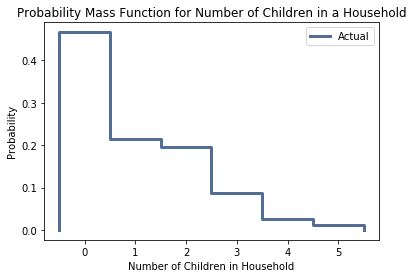

In [15]:
#Q2. Think Stats Ch. 3 Exercise 1 part 1
resp = nsfg.ReadFemResp()

#This part computes and plots the actual PMF for Number of Children in a Household
pmf_numkid = thinkstats2.Pmf(resp.numkdhh, label = 'Actual')
thinkplot.Pmf(pmf_numkid)
thinkplot.Config(xlabel = 'Number of Children in Household', ylabel = 'Probability', title = 'Probability Mass Function for Number of Children in a Household')

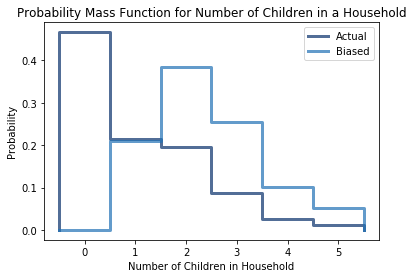

In [16]:
#Q2. Think Stats Ch. 3 Exercise 1 part 2

#This part computes a biased PMF and then plots it on the same graph as the actual PMF from above
biased_pmf_numkid = pmf_numkid.Copy(label = 'Biased')

for x, p in pmf_numkid.Items():
    biased_pmf_numkid.Mult(x, x)
    
biased_pmf_numkid.Normalize()

thinkplot.Pmfs([pmf_numkid, biased_pmf_numkid])
thinkplot.Config(xlabel = 'Number of Children in Household', ylabel = 'Probability', title = 'Probability Mass Function for Number of Children in a Household')



In [17]:
#Q2. Think Stats Ch. 3 Exercise 1 part 3

#This part prints the means of the actual and biased PMFs for the sake of comparison
print('The mean of the actual probability mass function for number of children in a household is: ' + str(round(pmf_numkid.Mean(), 2)))
print('The mean of the biased probability mass function for number of children in a household is: ' + str(round(biased_pmf_numkid.Mean(), 2)))

The mean of the actual probability mass function for number of children in a household is: 1.02
The mean of the biased probability mass function for number of children in a household is: 2.4


In [22]:
#Q3. Think Stats Ch. 4 Exercise 2 part 1

#This generates a list of random numbers as well as the Probability Mass Function and Cumulative Density Function
#of the random number list

random_nums = np.random.random(1000)
pmf_random_nums = thinkstats2.Pmf(random_nums)
cdf_random_nums = thinkstats2.Cdf(random_nums)

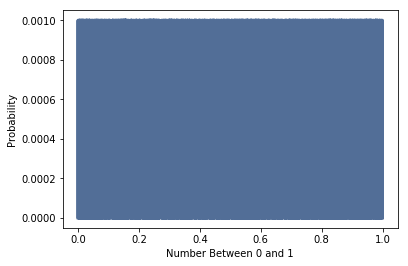

In [25]:
#Q3. Think Stats Ch. 4 Exercise 2 part 2

#This plots the Probability Mass Function of the Random Numbers, the distribution is approximately uniform 
# (i.e. P(any number) = ~0.001)

thinkplot.Pmf(pmf_random_nums)
thinkplot.Config(xlabel = 'Number Between 0 and 1', ylabel = 'Probability')

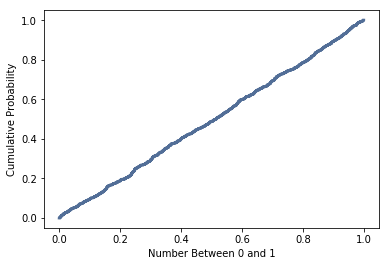

In [26]:
#Q3. Think Stats Ch. 4 Exercise 2 part 3

#This plots the Cumulative Function of the Random Numbers; the distribution is approximately uniform 
# (i.e. slope is approximately 1.0, P(x <= 0.20) = 0.20)

thinkplot.Cdf(cdf_random_nums)
thinkplot.Config(xlabel = 'Number Between 0 and 1', ylabel = 'Cumulative Probability')

In [37]:
#Q4. Think Stats Ch. 5 Exercise 1

#This creats a normal distribution with a mean of 178 and standard deviation 7.7, then calculates the percent of the
#US male population that falss into the range 5'10" and 6'1" by converting those values into centimeters
normdist_male_hgt = scipy.stats.norm(178, 7.7)

max_hgt_bmg = (6*12 + 1) * 2.54
min_hgt_bmg = (5*12 + 10) * 2.54
potential_bmg_member_pct = 100 * (normdist_male_hgt.cdf(max_hgt_bmg) - normdist_male_hgt.cdf(min_hgt_bmg))
print('The percentags of the US male population that could potentially join the Blue Man Group based on height is: %' +str(round(potential_bmg_member_pct, 2)))


The percentags of the US male population that could potentially join the Blue Man Group based on height is: %34.27


Q5. Bayesian (Elvis Presley twin)

Question: Bayes' Theorem is an important tool in understanding what we really know, given evidence of other information we have, in a quantitative way. It helps incorporate conditional probabilities into our conclusions.

Elvis Presley had a twin brother who died at birth. What is the probability that Elvis was an identical twin? Assume we observe the following probabilities in the population: fraternal twin is 1/125 and identical twin is 1/300.

Answer:  P(ident twin | twin bro) = P(ident twin and twin bro) / P(twin bro)
P(twin bro) = P(ident twin and twin bro) + P(frat twin and twin bro)
P(ident twin and twin bro) = P(ident twin) * P(both boys | ident twin) = (1/300) * (1/2) = (1/600)
NOTE: identical twins MUST be both boys OR both girls, so P(both boys | ident twin) = (1/2)
P(frat twins and twin bro) = prob(frat twin) * P(both boys | frat twin) = (1/125) * (1/4) = (1/500)
NOTE: fraternal twins can be one boy, one girl; one girl, one boy; two boys; or two girls with equal probability, so P(both boys | frat twin) = (1/4)

P(ident twin | twin bro) = (1/600) / ((1/600) + (1/500)) = (1/600) / (11/3000) = (5/11)

ANSWER => 5/11

Q6. Bayesian & Frequentist Comparison

Question: How do frequentist and Bayesian statistics compare?

Answer: The Bayesian interpretation begins with an a priori belief in the probability of a certain outcome, and then adjusts that belief according to observations. The Frequentist interpretation begins with observations of a phenomena and uses Bayes' theorem to interpret conditional probabilities given that a certain phenomena has occured.